Putu Gery Wahyu Nugraha | 13516100

# Q1 
### Model pada Data Science

Model pada data sains merupakan sebuah abstraksi atau asumsi secara statistik dari suatu sampel data dari suatu populasi. Umumnya model ini merupakan sebuah distribusi probabilitas dimana diasumsikan distribusi ini dapat mengestimasi nilai distribusi sebenarnya

# Q2
### Gradient Descent

##### Apa itu Gradient Descent
Gradient Descent merupakan sebuah algoritma optimisasi yang bertujuan untuk meminimalkan nilai sebuah fungsi. Hal ini dilakukan dengan selalu menelusuri jalur yang meminimalkan nilai fungsi.

##### Cara dan Keadaan Data 
Gradient descent bekerja dengan menelusuri jalur yang meminimalkan nilai fungsi. Walaupun pada beberapa implementasi Gradient Descent, penelusur memiliki kemungkinan untuk mengikuti jalur yang memaksimalkan fungsi (*learning rate*). Hal ini dilakukan untuk menghindari lokal minimum.

Gradient Descent tepat dipakai ketika jumlah data yang dimiliki sangat besar atau ketika fungsi estimasi yang diperlukan kompleks. Contoh kita memiliki sebuah data yang ingin kita estimasi. Setelah ditelusuri ternyata fungsi liniar tidak dapat digunakan untuk mengestimasi nilai data tersebut. Cara lain tentu saja dengan menggunakan fungsi polinom, tapi jika performa merupakan suatu masalah utama, akan lebih baik menggunakan Gradient Descent.

##### Tujuan dari Gradient Descent
Seperti dibahas diatas, Gradient Descent berguna untuk mengestimasi sebuah data berjumlah banyak dengan kompleksitas yang tinggi, karena performa dari algoritma ini diatas rata-rata.

##### Stocasthic Gradient Descent
Perbedaan paling utama antar Stocasthic Gradient Descent (SGD) dengan Gradient Descent (GD) biasa adalah pada SGD sampel data yang dipilih ditentukan secara acak, berbeda dengan GD dimana data diambil sebagai sebuah kelompok utuh. Ini membuat performa SGD lebih tinggi dibandingkan GD biasa.

# Q3
### Nobody Like Losing Money

Untuk menyelesaikan soal ini kita hanya perlu menemukan titik minimum, atau titik dimana gradien dari garis mencapai 0. Karena titik ini merupakan titik balik dimana harga saham mulai meningkat. 

Fungsi gradien dari harga saham tersebut adalah 

`f(x) = -x + 5`

Nilai gradien akan 0 ketika

`0 = -x + 5`

`x = 5`

Maka harga saham mulai turun ketika nilai `x = 5`. Maka akan lebih bijak untuk stop berinvestasi pada saat itu juga

# Q4 & Q5
### Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDClassifier
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
num_friends = [100, 49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 12, 12, 11, 10,
               10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
               9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6,
               6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4,
               4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
               3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
               1, 1, 1, 1, 1, 1, 1, 1]

daily_minutes = [1, 68.77, 51.25, 52.08, 38.36, 44.54, 57.13, 51.4, 41.42, 31.22, 34.76, 54.01, 38.79, 47.59, 49.1,
                 27.66, 41.03, 36.73, 48.65, 28.12, 46.62, 35.57, 32.98, 35, 26.07, 23.77, 39.73, 40.57, 31.65, 31.21,
                 36.32, 20.45, 21.93, 26.02, 27.34, 23.49, 46.94, 30.5, 33.8, 24.23, 21.4, 27.94, 32.24, 40.57, 25.07,
                 19.42, 22.39, 18.42, 46.96, 23.72, 26.41, 26.97, 36.76, 40.32, 35.02, 29.47, 30.2, 31, 38.11, 38.18,
                 36.31, 21.03, 30.86, 36.07, 28.66, 29.08, 37.28, 15.28, 24.17, 22.31, 30.17, 25.53, 19.85, 35.37, 44.6,
                 17.23, 13.47, 26.33, 35.02, 32.09, 24.81, 19.33, 28.77, 24.26, 31.98, 25.73, 24.86, 16.28, 34.51,
                 15.23, 39.72, 40.8, 26.06, 35.76, 34.76, 16.13, 44.04, 18.03, 19.65, 32.62, 35.59, 39.43, 14.18, 35.24,
                 40.13, 41.82, 35.45, 36.07, 43.67, 24.61, 20.9, 21.9, 18.79, 27.61, 27.21, 26.61, 29.77, 20.59, 27.53,
                 13.82, 33.2, 25, 33.1, 36.65, 18.63, 14.87, 22.2, 36.81, 25.53, 24.62, 26.25, 18.21, 28.08, 19.42,
                 29.79, 32.8, 35.99, 28.32, 27.79, 35.88, 29.06, 36.28, 14.1, 36.63, 37.49, 26.9, 18.58, 38.48, 24.48,
                 18.95, 33.55, 14.24, 29.04, 32.51, 25.63, 22.22, 19, 32.73, 15.16, 13.9, 27.2, 32.01, 29.27, 33, 13.74,
                 20.42, 27.32, 18.23, 35.35, 28.48, 9.08, 24.62, 20.12, 35.26, 19.92, 31.02, 16.49, 12.16, 30.7, 31.22,
                 34.65, 13.13, 27.51, 33.2, 31.57, 14.1, 33.42, 17.44, 10.12, 24.42, 9.82, 23.39, 30.93, 15.03, 21.67,
                 31.09, 33.29, 22.61, 26.89, 23.48, 8.38, 27.81, 32.35, 23.84]

In [3]:
plt.rcParams['figure.figsize'] = (16,8)

data_dic = {
    "num_friends": num_friends,
    "daily_minutes": daily_minutes
}

df = pd.DataFrame(data_dic)

Pertama kita harus menghapus data *outliers*, data yang memiliki nilai ekstrim, dari data kita. Agar penggambaran data lebih merepresentasikan

In [4]:
df = df[df.daily_minutes < df.daily_minutes.quantile(0.995)]
df = df[df.daily_minutes > df.daily_minutes.quantile(0.005)]

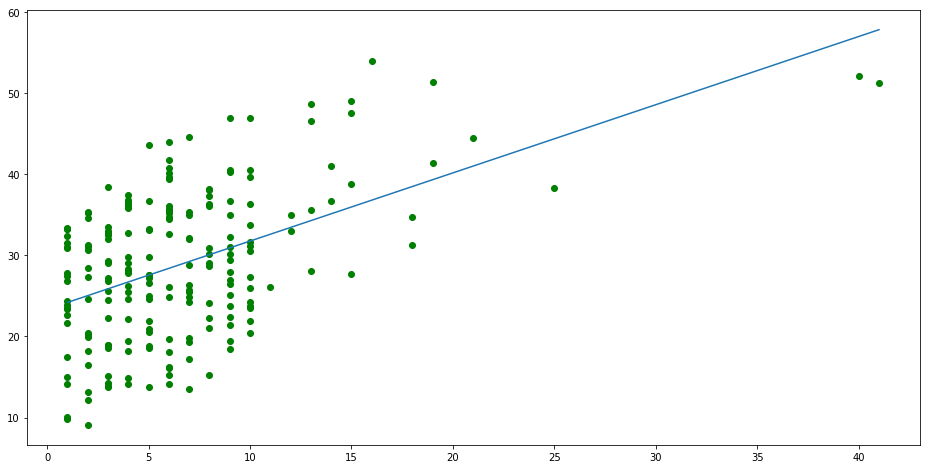

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(
    X=df['num_friends'].values[:, np.newaxis], 
    y=df['daily_minutes'].values[:, np.newaxis]
)

df['daily_minutes_pred'] = lin_reg.predict(df['num_friends'].values[:, np.newaxis])

plt.scatter(df['num_friends'], df['daily_minutes'], color='green')
plt.plot(df['num_friends'], df['daily_minutes_pred'])
plt.show()

Dari grafik yang dihasilkan dapat dilihat bahwa regresi liniar mampu mengestimasi korelasi antar `daily_minutes` dan `num_friends` menggunakan satu garis lurus. Dari grafik juga disimpulkan bahwa terdapat kolerasi yang positif antar lama waktu seseorang menggunakan sosial media dengan jumlah teman yang ia miliki

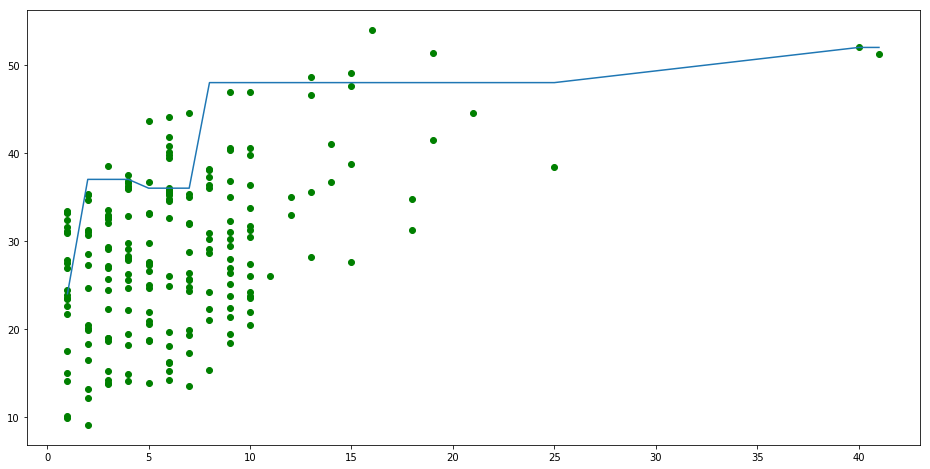

In [6]:
lin_reg_grad_desc = SGDClassifier(max_iter=1000)
lin_reg_grad_desc.fit(
    X=df['num_friends'].values[:, np.newaxis], 
    y=df['daily_minutes'].values.astype('int')
)

df['daily_minutes_pred'] = lin_reg_grad_desc.predict(
    df['num_friends'].values[:, np.newaxis])

plt.scatter(df['num_friends'], df['daily_minutes'], color='green')
plt.plot(df['num_friends'], df['daily_minutes_pred'])
plt.show()

Berbeda dengan grafik sebelumnya. Stochastic Gradient Descend menggunakan beberapa garis untuk membuat model liniar dari data `daily_minutes` dan `num_friends`. Walaupun setiap garis yang dihasilkan memiliki gradien yang berbeda, secara garis besar kita melihat bahwa garis tersebut memiliki kemiringan yang positif. Kesimpulannya terdapat kolerasi positif antar lama waktu seseorang menggunakan sosial media dengan jumlah teman yang ia miliki.